## Took the dataset from Andrew NG machine learning course. Goal here to classify the handwritten digits from 0 - 10. Will use Logistic Regression influenced by concept given by Andrew NG in his machine learning course.


### There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. The 20 by 20 grid of pixels is unrolled" into a 400-dimensional vector. 

In [153]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [154]:
data = loadmat("data\ex3data1.mat")
print(data['X'].shape)
print(data['y'].shape)

(5000, 400)
(5000, 1)


###  Plot one image from input

In [155]:
def show(img, title:None):
    plt.imshow(img, cmap='gray')
    if(title is not None): plt.title(title)

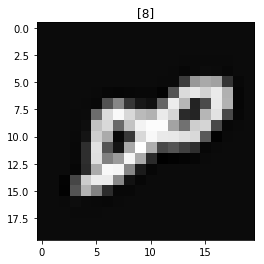

In [165]:
#reshape by 20*20
image = np.reshape(data['X'][4000],(20,20))
image.shape
show(image, data['y'][4000])

###  Let   me copy the Logisitc Regression and gradient desent Class which i done in my previous session and extend the class to support multi classification

In [131]:
from sklearn.metrics import accuracy_score


class LogisticRegression():
    def __init__(self, X, y , X_valid, y_valid, lr,epochs, reg = False,useoptimizer = False,ismultiClass = False):
        self.X,self.y,  self.X_valid,self.y_valid,self.lr ,self.epochs,self.reg,self.useoptimizer, self.ismultiClass= X, y , X_valid, y_valid, lr, epochs, reg, useoptimizer,ismultiClass
        if(not ismultiClass):            
            self.optim = GradientDesent( X, y , X_valid, y_valid, lr,epochs, reg,useoptimizer, self.sigmoid)
   
    def sigmoid(self, z):    
        return 1/(1+np.exp(-z))  
    
    def fit(self):
        if(self.ismultiClass):
            self.fitMulti()
        else:
            w = self.optim.optimize()
            h = sigmoid(np.dot(self.X, w))
            h_valid = sigmoid(np.dot(self.X_valid, w))
            train_preds = [1 if i > 0.5 else 0 for i in h]
            val_preds = [1 if i > 0.5 else 0 for i in h_valid]
            train_accuracy =  accuracy_score(self.y , train_preds)
            val_accuracy =  accuracy_score(self.y_valid , val_preds)

            print(f'Train Accuracy: {train_accuracy} Val Accuracy: {val_accuracy}')   
        
        
    def fitMulti(self):
        labelCount = len(np.unique(self.y))
        print(f'Total label Count: {labelCount}') 
        w = np.zeros((labelCount, self.X.shape[1]))
                     
        for i in range(1, labelCount+1):
            print(f'Train LG for class : {i}')
            y_change = np.array([1 if i == label else 0 for label in self.y])
            y_valid_change = np.array([1 if i == label else 0 for label in self.y_valid])            
            optim = GradientDesent( self.X, y_change , self.X_valid, y_valid_change, self.lr, self.epochs, self.reg, self.useoptimizer, self.sigmoid)
            w[i-1:] = optim.optimize()                     
        
        train_preds = np.argmax(self.sigmoid(np.dot(self.X, w.T)) ,axis = 1) + 1
        val_preds = np.argmax(self.sigmoid(np.dot(self.X_valid, w.T)) ,axis = 1) + 1         
        
        train_accuracy =  accuracy_score(self.y , train_preds)
        val_accuracy =  accuracy_score(self.y_valid , val_preds)        
        print(f'Train Accuracy: {train_accuracy} Val Accuracy: {val_accuracy}')
                           
        

In [132]:
import scipy.optimize as opt
class GradientDesent():
    
    def __init__(self, X, y , X_valid, y_valid, lr, epochs, reg = False, useoptimizer = False, activate_fn = None):
        self.X,self.y,  self.X_valid,self.y_valid,self.lr ,self.epochs, self.reg, self.useoptimizer, self.activate_fn  = X, y , X_valid, y_valid, lr,epochs, reg,useoptimizer,activate_fn
            
    def optimize(self):
        w = np.zeros(X.shape[1])
              
        
        if(self.useoptimizer):
            result = opt.fmin_tnc(func=self.cost, x0=w, fprime=self.gradient,args=(self.X, self.y)) 
            train_loss= self.cost(result[0], self.X, self.y)
            val_loss = self.cost(result[0], self.X_valid, self.y_valid)  
            print(f'Runned Spicy Optimizer > Train Loss: {train_loss} Val Loss: {val_loss}')          
            return result[0]             
            
        train_cost = np.zeros(self.epochs)
        val_cost = np.zeros(self.epochs)      

        
        for i in range(self.epochs):
            grad = self.gradient(w, self.X, self.y)
            w = np.subtract(w , np.multiply(grad , self.lr))
            train_loss= self.cost(w, self.X, self.y)
            val_loss = self.cost(w, self.X_valid, self.y_valid)         
            train_cost[i] = train_loss
            val_cost[i] = val_loss
            print(f'Epochs: {i} Train Loss: {train_loss} Val Loss: {val_loss}')   
            
        
        return w
        
    def cost(self,w, X, y):
        h = np.dot(X, w)
        m = len(X)       
        if(self.activate_fn != None):  h = self.activate_fn(h)
        
        loss= (np.dot(-y, np.log(h))) - (np.dot(1-y, np.log(1-h)))
        loss = np.sum(loss)/m
        
        if(self.reg):           
            loss = loss + ((self.lr/2*m) * np.sum(np.power(w,2)))
        return loss
            
    
    def gradient(self,w,X, y):
        h = np.dot(X, w)      
        if(self.activate_fn != None):  h = self.activate_fn(h)     
        m = len(X)
        loss= h - y
        gradient = np.dot(X.T,loss)/m
        if(self.reg): gradient = gradient + np.dot((self.lr/m), w)      
        return gradient

In [133]:
X = np.insert(data['X'], 0,  np.ones(data['X'].shape[0]), axis =1)
y =  data['y']

In [134]:
X_train, X_valid, y_train, y_valid = train_test_split(
            X,y, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_valid.shape)

(4250, 401)
(750, 401)


In [144]:
model = LogisticRegression(X_train, y_train,X_valid,y_valid,  lr = 0.001, epochs =5000,useoptimizer=True,ismultiClass=True)
model.fit()

Total label Count: 10
Train LG for class : 1


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


Runned Spicy Optimizer > Train Loss: 0.002923041733598084 Val Loss: 0.138538817864986
Train LG for class : 2
Runned Spicy Optimizer > Train Loss: 0.028470023386103632 Val Loss: 0.2696736429306643
Train LG for class : 3
Runned Spicy Optimizer > Train Loss: 0.03293049777668425 Val Loss: nan
Train LG for class : 4
Runned Spicy Optimizer > Train Loss: 0.02734732825590251 Val Loss: 0.0907335536576923
Train LG for class : 5
Runned Spicy Optimizer > Train Loss: 0.027994746815151718 Val Loss: 0.23885494175167288
Train LG for class : 6
Runned Spicy Optimizer > Train Loss: 0.0055219151298216635 Val Loss: 0.17925622430139207
Train LG for class : 7
Runned Spicy Optimizer > Train Loss: 0.019568046980762508 Val Loss: 0.1346285309284556
Train LG for class : 8
Runned Spicy Optimizer > Train Loss: 0.055570550206426934 Val Loss: 0.24359708820847892
Train LG for class : 9
Runned Spicy Optimizer > Train Loss: 0.04223319830224293 Val Loss: 0.32487084597910837
Train LG for class : 10
Runned Spicy Optimizer 

### With Regularization

In [148]:
model = LogisticRegression(X_train, y_train,X_valid,y_valid,  lr = 0.0000001, epochs =5000,reg = True, useoptimizer=True,ismultiClass=True)
model.fit()

Total label Count: 10
Train LG for class : 1
Runned Spicy Optimizer > Train Loss: 0.03250798310363381 Val Loss: 0.05026684314405355
Train LG for class : 2
Runned Spicy Optimizer > Train Loss: 0.07681252224323201 Val Loss: 0.11384103048925709
Train LG for class : 3
Runned Spicy Optimizer > Train Loss: 0.08235614851997286 Val Loss: 0.09411560987136036
Train LG for class : 4
Runned Spicy Optimizer > Train Loss: 0.060484883155183224 Val Loss: 0.07343524436019651
Train LG for class : 5
Runned Spicy Optimizer > Train Loss: 0.09115962198398103 Val Loss: 0.08995227763724033
Train LG for class : 6
Runned Spicy Optimizer > Train Loss: 0.04251527798702612 Val Loss: 0.06923898052032325
Train LG for class : 7
Runned Spicy Optimizer > Train Loss: 0.05246759450811332 Val Loss: 0.07253550930589386
Train LG for class : 8
Runned Spicy Optimizer > Train Loss: 0.1135066041276439 Val Loss: 0.10061835531918789
Train LG for class : 9
Runned Spicy Optimizer > Train Loss: 0.10266840457205065 Val Loss: 0.107018